<a href="https://colab.research.google.com/github/dishankkalra23/Explore-Weather-Trends/blob/main/Explore_Weather_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
city_data = pd.read_csv("/content/drive/MyDrive/Explore Weather Trends/city_data.csv")
city_data.shape

(70792, 4)

# List of Cities in India

In [3]:
Indian_cities = city_data[city_data['country']=='India']['city'].unique()
Indian_cities

array(['Agra', 'Ahmadabad', 'Allahabad', 'Amritsar', 'Bangalore',
       'Bhopal', 'Delhi', 'Haora', 'Hyderabad', 'Indore', 'Jaipur',
       'Kanpur', 'Ludhiana', 'Nagpur', 'New Delhi', 'Patna', 'Pune',
       'Rajkot', 'Ranchi', 'Surat', 'Vadodara', 'Varanasi'], dtype=object)

## Number of Indian Cities

In [4]:
len(Indian_cities)

22

# Indian city choosen: Hyderabad



## Number of rows in Hyderabad's data
Note - There are two cities with name as Hyderabad, one in India and other in Pakistan 

In [5]:
data_hyderabad = city_data[(city_data['country']=='India') & (city_data['city']=='Hyderabad')]
data_hyderabad.shape[0]

218

# Handling Missing values

In [6]:
data_hyderabad

,year,city,country,avg_temp
26146,1796,Hyderabad,India,26.53
26147,1797,Hyderabad,India,27.48
26148,1798,Hyderabad,India,26.20
26149,1799,Hyderabad,India,26.84
26150,1800,Hyderabad,India,26.88
...,...,...,...,...
26359,2009,Hyderabad,India,28.03
26360,2010,Hyderabad,India,27.69
26361,2011,Hyderabad,India,27.41
26362,2012,Hyderabad,India,28.02


## Note: Only column-4(avg_temp) has null values

In [7]:
data_hyderabad.isnull().sum()

year        0
city        0
country     0
avg_temp    7
dtype: int64

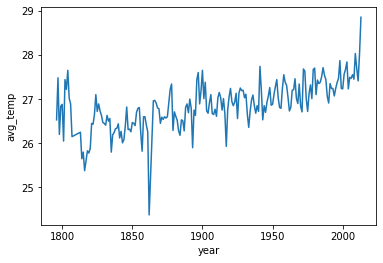

In [120]:
x_data = data_hyderabad['year']
y_data = data_hyderabad['avg_temp']

sns.lineplot(x=x_data,y=y_data,data=data_hyderabad)
plt.show()

## Filling missing values with mean value of column(avg_temp)

In [9]:
mean_val = data_hyderabad['avg_temp'].mean(axis=0,skipna=True)
mean_val

26.861563981042668

In [10]:
data_hyderabad_with_mean = data_hyderabad.fillna(mean_val)

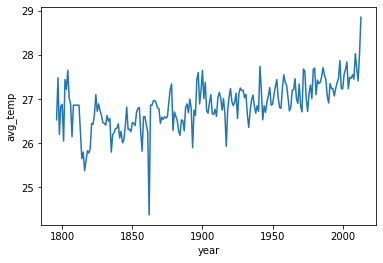

In [13]:
x_data_2 = data_hyderabad_with_mean['year']
y_data_2 = data_hyderabad_with_mean['avg_temp']

sns.lineplot(x=x_data_2,y=y_data_2,data=data_hyderabad_with_mean)
plt.show()

## Filling missing values with interpolation method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


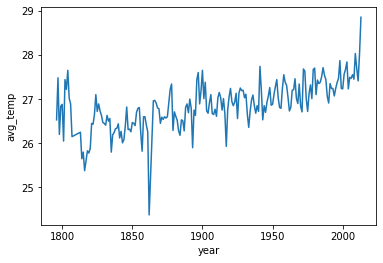

In [18]:
sns.lineplot(x=x_data,y=y_data,data=data_hyderabad.interpolate(inplace=True))
plt.show()

# Moving Averages of Hyderabad's yearly


## Checking if there is any missing values( filled missing values using interpolate )

In [20]:
data_hyderabad.isnull().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

## Function to find moving averages of yearly temperature in Hyderabad

### Making a new column 'moving_avg'

In [112]:
check_data = data_hyderabad.copy()
check_data['moving_avg'] = np.nan
check_data

,year,city,country,avg_temp,moving_avg
26146,1796,Hyderabad,India,26.53,NaN
26147,1797,Hyderabad,India,27.48,NaN
26148,1798,Hyderabad,India,26.20,NaN
26149,1799,Hyderabad,India,26.84,NaN
26150,1800,Hyderabad,India,26.88,NaN
...,...,...,...,...,...
26359,2009,Hyderabad,India,28.03,NaN
26360,2010,Hyderabad,India,27.69,NaN
26361,2011,Hyderabad,India,27.41,NaN
26362,2012,Hyderabad,India,28.02,NaN


### Function: Running_a(window_size,rows,prev,new) 





In [113]:
def running_avg(window_size,rows,prev,new):
  for i in range(rows - window_size + 1):
    calc_running_avg = 0
    for j in range(i, i + window_size):
      calc_running_avg += prev.iloc[j]
    new.iloc[i + window_size - 1] = calc_running_avg/window_size
  return check_data

In [114]:
new = check_data['moving_avg']
prev = check_data['avg_temp']
rows = check_data.shape[0]
window_size = 25

result = running_avg(window_size,rows,prev,new)
print(result)

       year       city country  avg_temp  moving_avg
26146  1796  Hyderabad   India     26.53         NaN
26147  1797  Hyderabad   India     27.48         NaN
26148  1798  Hyderabad   India     26.20         NaN
26149  1799  Hyderabad   India     26.84         NaN
26150  1800  Hyderabad   India     26.88         NaN
...     ...        ...     ...       ...         ...
26359  2009  Hyderabad   India     28.03     27.4312
26360  2010  Hyderabad   India     27.69     27.4384
26361  2011  Hyderabad   India     27.41     27.4264
26362  2012  Hyderabad   India     28.02     27.4456
26363  2013  Hyderabad   India     28.85     27.5020

[218 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


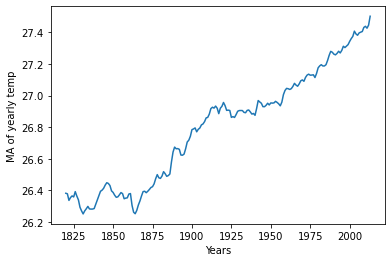

In [115]:
x_data_3 = check_data['year']
y_data_3 = check_data['moving_avg']

ax = sns.lineplot(x=x_data_3,y=y_data_3,data=check_data)
ax.set(xlabel='Years',ylabel='MA of yearly temp')
plt.show()

## Using **rolling** method to find moving averages

In [118]:
check_data['MA_window_size'] = check_data['avg_temp'].rolling(window=50).mean()
check_data.head(30)

,year,city,country,avg_temp,moving_avg,MA_window_size
26146,1796,Hyderabad,India,26.530000,NaN,NaN
26147,1797,Hyderabad,India,27.480000,NaN,NaN
26148,1798,Hyderabad,India,26.200000,NaN,NaN
26149,1799,Hyderabad,India,26.840000,NaN,NaN
26150,1800,Hyderabad,India,26.880000,NaN,NaN
26151,1801,Hyderabad,India,26.050000,NaN,NaN
26152,1802,Hyderabad,India,27.440000,NaN,NaN
26153,1803,Hyderabad,India,27.220000,NaN,NaN
26154,1804,Hyderabad,India,27.650000,NaN,NaN
26155,1805,Hyderabad,India,27.020000,NaN,NaN


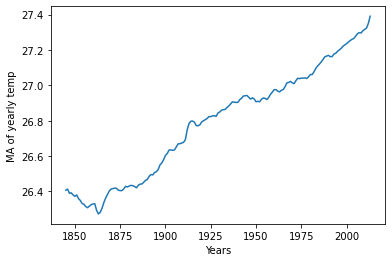

In [119]:
x_data_3 = check_data['year']
y_data_3 = check_data['MA_window_size']

ax = sns.lineplot(x=x_data_3,y=y_data_3,data=check_data)
ax.set(xlabel='Years',ylabel='MA of yearly temp')
plt.show()